<a href="https://colab.research.google.com/github/SidV2/ML_Workshop/blob/main/workshop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skd
from sklearn import preprocessing 
import tensorflow.keras as tfk
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from mlxtend.plotting import plot_decision_regions


In [2]:
#Generating synthetic linear dataset 
X,y = skd.make_regression(n_samples=100, n_features=1, n_targets=1, bias=0.5, noise=5.5, random_state=42)


In [ ]:
#Reading dataset from csv file 
#dataframe = pd.read_csv("datasetName.csv", header=None) #header=0 if first row/line is the header of the dataset
#dataset = dataframe.values
#Split into input (X) and output (Y) variables,
#Lets say the dataset have n number of columns where the last column is the target value 
#therefore we have first n-2 columns as independent variables (inputs) and the (n-1)th column is the as output since index starts from 0
#X = dataset[:,0:n-1] # when range is [start:end] value is read from start to end-1 index 
#y = dataset[:,n-1] # here it is not range is specific index


Visualizing the Synthetic Dataset


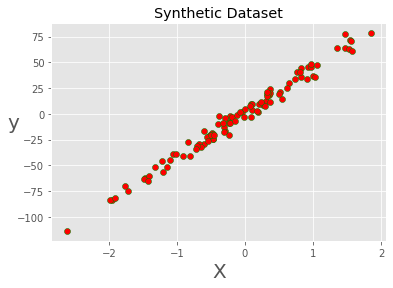

In [3]:
# Visulalizing the synthetic dataset
print("\nVisualizing the Synthetic Dataset")
plt.style.use("ggplot")
plt.scatter(X,y,color='red',edgecolors="green")
plt.title("Synthetic Dataset")
plt.xlabel("X", fontsize=20)
plt.ylabel("y",rotation = 0, fontsize = 20)
plt.show()


In [5]:
#reshaping the y values into 2D matrix of 1 column
y = y.reshape(-1,1) #if y is not an array then use, np.asanyarray(y).reshape(-1,1)
# Equivalent code y = np.reshape(y,(-1,1))

In [ ]:
#Feature Scaling (Standardization : needs 2D array as input) 
#Here your data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: z= (Xi - μ)/𝛔
#sc = preprocessing.StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(y)

In [ ]:
# Visulalizing the synthetic dataset after standardization 
#print("\nVisualizing the Synthetic Dataset after Standardization")
#plt.style.use("ggplot")
#plt.scatter(X,y,color='red',edgecolors="green")
#plt.title("Synthetic Dataset")
#plt.xlabel("X", fontsize=20)
#plt.ylabel("y",rotation = 0, fontsize = 20)
#plt.show()

In [6]:
#Spliting the dataset into Training and Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
#A shape (5,2,8) means an array or tensor with 3 dimensions, containing 5 elements in the first dimension, 
#2 in the second and 8 in the third, totaling 30*4*10 = 1200 elements or numbers.
#What flows between layers are tensors. Tensors can be seen as matrices, with shapes.
#In Keras, the input layer itself is not a layer, but a tensor. It's the starting tensor you send to the first 
#hidden layer. This tensor must have the same shape as your training data.
#In our example input data is one dimentional and also has only one element (column). 

In [8]:
model = tfk.Sequential([
        tfk.Input(shape = (1,)),            
        tfk.layers.Dense(50, activation='tanh'),  #first hidden layer
        tfk.layers.Dense(100, activation='tanh'), #second hidden layer
        tfk.layers.Dense(1,) #activation linear by default, also can add: activation ='linear' 
        ])

In [9]:
#model Looks like:  1 input -> [50 units in layer1] ->[100 units in layer2] -> 1 output

#Compiling the model with Stochatstic Gradient Discent optimizer and MSE as the loss function
model.compile(optimizer=tfk.optimizers.SGD(lr=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])
#Model's Summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
#Training the model 
training = model.fit(X_train,y_train, epochs = 50, batch_size =10)
#Testing the models performance 
y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred)
print("Testset Result: \n---------------")
print("MSE: ", mse)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 1369.4343 - mean_squared_error: 1369.4343
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 866.2783 - mean_squared_error: 866.2783
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 383.8875 - mean_squared_error: 383.8875
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 214.6123 - mean_squared_error: 214.6123
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 172.6559 - mean_squared_error: 172.6559
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 152.6119 - mean_squared_error: 152.6119
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 135.7523 - mean_squared_error: 135.7523
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 122.1289 - mean_squared_error: 122.1289
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 109.9827 - mean_squared_error: 109.9827
Epoch 10

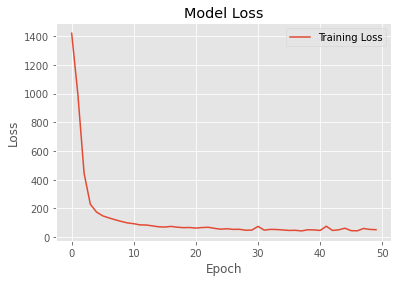

In [ ]:
#Visualizing training loss values
plt.plot(training.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
#Reshapping the matrix into array to pass the value into np.linspace() for 2D visualizaiton. 
x_train_arr = np.asarray(X_train).reshape(-1)
y_train_arr = np.asarray(y_train).reshape(-1)
x_test_arr = np.asarray(X_test).reshape(-1)
y_test_arr = np.asarray(y_test).reshape(-1)
#Creating evenly spaced values for smooth visulatization
xp_train = np.linspace(x_train_arr.min(), x_train_arr.max())
xp_test = np.linspace(x_test_arr.min(), x_test_arr.max())

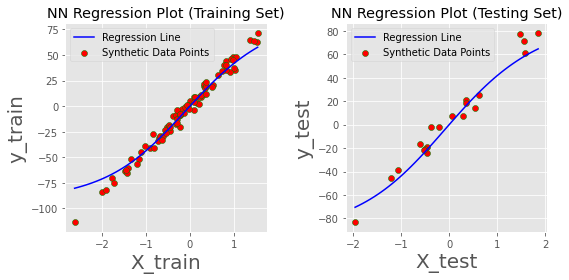

In [ ]:
#Visulalizing training and testing plots. 
fig, ax = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter (X_train, y_train, color='red', edgecolors='green', label='Synthetic Data Points')
ax[0].plot(xp_train,model.predict(xp_train.reshape(-1)),color='blue', label='Regression Line')
ax[0].set_title("NN Regression Plot (Training Set)")
ax[0].set_xlabel("X_train", fontsize=20)
ax[0].set_ylabel("y_train", fontsize = 20)
ax[0].legend()
ax[1].scatter(X_test,y_test,color='red', edgecolors='green', label='Synthetic Data Points')
ax[1].plot(xp_test,model.predict(xp_test.reshape(-1)),color='blue',label='Regression Line')
ax[1].set_title("NN Regression Plot (Testing Set)")
ax[1].set_xlabel("X_test", fontsize=20)
ax[1].set_ylabel("y_test", fontsize = 20)
ax[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#Creating Linear Regression Model
lr_model = LinearRegression()
#Training the model
lr_model.fit(X_train,y_train)
#Testing the model's performance
y_pred_lr = lr_model.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred_lr)
print("MSE: ", mse)

MSE:  43.23366621507749


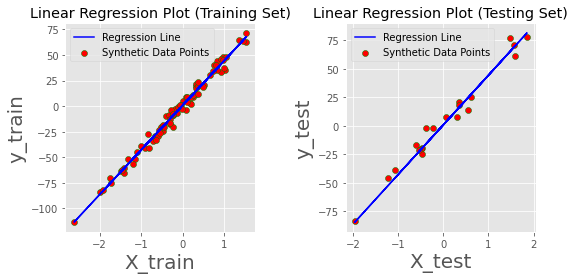

In [ ]:
#Visualizing the Training and Testset performance of Linear Regression
fig, ax = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter (X_train, y_train, color='red', edgecolors='green', label='Synthetic Data Points')
ax[0].plot(X_train,lr_model.predict(X_train),color='blue', label='Regression Line')
ax[0].set_title("Linear Regression Plot (Training Set)")
ax[0].set_xlabel("X_train", fontsize=20)
ax[0].set_ylabel("y_train", fontsize = 20)
ax[0].legend()
ax[1].scatter(X_test,y_test,color='red', edgecolors='green', label='Synthetic Data Points')
ax[1].plot(X_test,lr_model.predict(X_test),color='blue',label='Regression Line')
ax[1].set_title("Linear Regression Plot (Testing Set)")
ax[1].set_xlabel("X_test", fontsize=20)
ax[1].set_ylabel("y_test", fontsize = 20)
ax[1].legend()
plt.tight_layout()
plt.show()

In [ ]:

#Generating synthetic non-linear data to solve classification problem
X,y = skd.make_circles(n_samples=100, shuffle=False, noise=None, random_state=None, factor=0.5)

In [ ]:
#Following classes will not be shapped as circle, parameters can be changed to make it more non-linear
#X, y = skd.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
#                             n_clusters_per_class=1,class_sep=0.5,flip_y=0.2, random_state=1,shuffle=False)

#Finding and counting unique elements. 
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique class of the dataset:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique class of the dataset:
[[ 0  1]
 [50 50]]


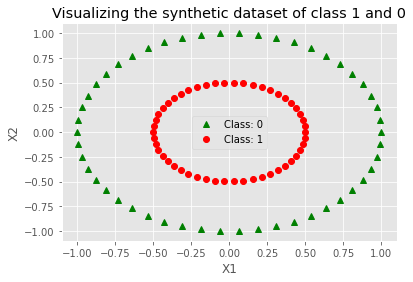

In [ ]:
#Visualizing the synthetic dataset of Class 1 and Class -1: 
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label='Class: 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro' , label="Class: 1")
plt.title("Visualizing the synthetic dataset of class 1 and 0")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show() 

In [ ]:
#Spliting the dataset into train and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("Frequency of unique class of elements in the test set:")
unique_elements_test, count_elements_test=np.unique(y_test, return_counts=True)
print(unique_elements_test, count_elements_test)

Frequency of unique class of elements in the test set:
[0 1] [10 10]


In [ ]:
#Creating validation set  by copying last 10 elements from the training set
X_val = X_train[70:]
y_val = y_train[70:]
#Removing the validation set (last 10 elements) from training set
X_train = X_train[:70]
y_train = y_train[:70]

In [ ]:
#Creating the deep learning model (Lets try a differnt apprach, can be used same approach shown earlier) 
model = tfk.Sequential()
model.add(tfk.layers.Dense(50,input_shape=(2,), activation='relu')) #First Hidden Layer
model.add(tfk.layers.Dense(100, activation='relu')) #Second  Hidden Layer
model.add(tfk.layers.Dense(1, activation='sigmoid')) #Output Layer

In [ ]:
#Model can be crated using following approach as well
#input_units = tfk.Input(shape=(2,))
#hidden_layer1 = tfk.layers.Dense(100, activation ='relu')((input_units))
#hidden_layer2 = tfk.layers.Dense(50, activation ='relu')(hidden_layer1)
#prediction = tfk.layers.Dense(1, activation ='sigmoid')(hidden_layer2)
#model = tfk.models.Model(inputs=input_units, outputs=prediction)

#model Looks like:  2 input -> [50 units in layer1] ->[100 units in layer2] -> 1 output

In [ ]:
# Compiling the model for binary classification # Use loss = categorical_crossentropy for multiclass prediction. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
#Model's Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Training the model 
training = model.fit(X_train,y_train, epochs = 50, batch_size =10, validation_data =(X_val,y_val))



NameError: ignored

KeyError: ignored

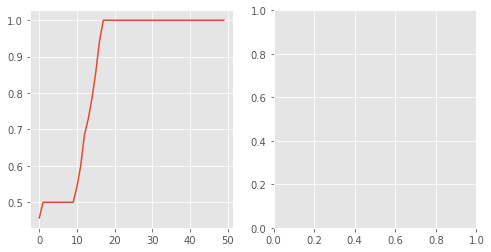

In [ ]:
#Visulaizing the Training and Validation Sets Loss and Accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#Plot training and validation accuracy values
#axes[0].set_ylim(0,1) #if we want to limit axis in certain range
axes[0].plot(training.history['accuracy'], label='Train')
axes[0].plot(training.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

In [ ]:
#Plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].plot(training.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluating the performance on the Test set 
test_loss_accuracy = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
# Visualising the Training and Test set plot decision area
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=model, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=model, ax=axes[1], legend=0)
axes[0].set_title('NN Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('NN Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')

In [ ]:
handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

In [ ]:
plt.tight_layout()
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Converting the predicted result into desired class level
# Singmoid produce the output between 0 and 1. Therefore, the decision boundary for sigmoid is 0.5
for i in range(0, len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [ ]:
# Generating confusion matrics, details classification report
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Neural Network Model:\n ",cm)
print( "{0}".format(metrics.classification_report(y_test,y_pred)))
# Generating accuracy in %, 
# Similary precision_score and recall_score can be used to generate precision and recall seperately
accuracy_test = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy:%.2f' % accuracy_test,"%")

In [ ]:
# Using non-linear svm calssifier , use kernel=linear for linear classifier. 
from sklearn import svm
classifier = svm.SVC(kernel='rbf') #rbf = 'radial basis function' for non-linear classification
classifier.fit(X_train,y_train)

# Predicting Teset set result
y_pred = classifier.predict(X_test)

In [ ]:
# Generating confusion matrics, details classification report
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for SVM Clssifer:\n ",cm)
print( "{0}".format(metrics.classification_report(y_test,y_pred)))
# Generating accuracy in %, 
# Similary precision_score and recall_score can be used to generate precision and recall seperately
accuracy_test = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy:%.2f' % accuracy_test,"%")


In [ ]:
# Visualising the Training and Test set plot decision area
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=classifier, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=classifier, ax=axes[1], legend=0)
axes[0].set_title('SVM Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('SVM Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

In [ ]:
plt.tight_layout()
plt.show()